In [51]:
"""
First, import the required Python dependencies.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt # module for plotting 
% matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

'\nFirst, import the required Python dependencies.\n'

In [52]:
# Pandas Dataframe
df = pd.read_csv('flight_data_cleaned.csv' )

In [100]:
# Find variable thats needs to be taken care(either drop or fill).
df.head(5)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed_in_mph,date
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,370.044053,2013-1-1
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,374.273128,2013-1-1
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,408.375000,2013-1-1
19,19,2013,1,1,601.0,600,1.0,844.0,850,-6.0,...,N644JB,EWR,PBI,147.0,1023,6,0,01-01-2013 06:00,417.551020,2013-1-1
25,25,2013,1,1,608.0,600,8.0,807.0,735,32.0,...,N9EAMQ,EWR,ORD,139.0,719,6,0,01-01-2013 06:00,310.359712,2013-1-1


In [101]:
df.loc[:, ["dep_delay"] ].describe()

,dep_delay
count,136684.000000
mean,37.974880
std,52.957721
min,0.141047
25%,7.000000
50%,19.000000
75%,47.000000
max,1301.000000


In [102]:
# Descriptive statistics by group
# dep_delay & flight groupby origin(airports)
grp_dep = df[['dep_delay']].groupby(df['origin']).describe()
grp_dep



dep_delay
origin                    
EWR    count  55950.000000
       mean      37.850291
       std       51.280845
       min        0.141047
       25%        7.000000
       50%       19.781088
       75%       48.000000
       max     1126.000000
JFK    count  43894.000000
       mean      37.111030
       std       52.562893
       min        0.141047
       25%        6.000000
       50%       17.004497
       75%       46.000000
       max     1301.000000
LGA    count  36840.000000
       mean      39.193356
       std       55.833539
       min        0.141047
       25%        7.000000
       50%       19.000000
       75%       48.000000
       max      911.000000

In [103]:
# Filter flights that are delayed (ie. Dep_delay > 0 mins)
df = df[df['dep_delay'] > 0]

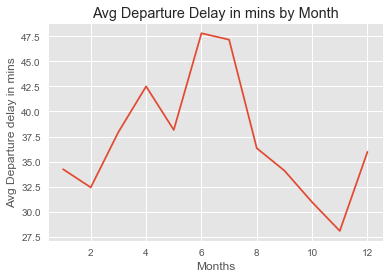

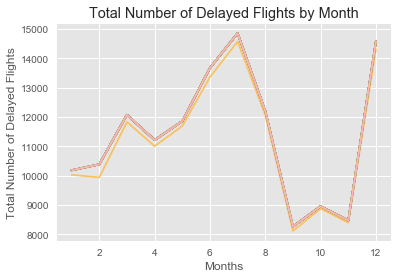

In [116]:
# Exploring the seasonal patterns in average departure delay in mins by Month
plt.plot(df.groupby('month')['dep_delay'].mean())
plt.xlabel('Months', size = 12)
plt.ylabel('Avg Departure delay in mins')
plt.title('Avg Departure Delay in mins by Month')
plt.show()

# Exploring the seasonal patterns in total number of delayed by Month
plt.plot(df.groupby('month').count())
plt.xlabel('Months', size = 12)
plt.ylabel('Total Number of Delayed Flights')
plt.title('Total Number of Delayed Flights by Month')
plt.show()

(array([  3.17485393e-02,   1.45163336e-02,   8.18867217e-03,
          5.04705660e-03,   3.73045759e-03,   2.74961664e-03,
          2.16189944e-03,   1.67766546e-03,   1.31941105e-03,
          1.06857673e-03,   8.25053714e-04,   6.66454432e-04,
          5.73656979e-04,   4.79734709e-04,   3.98747841e-04,
          3.13261703e-04,   2.55896005e-04,   2.07528848e-04,
          1.80533226e-04,   1.27104390e-04,   1.12481761e-04,
          9.72967229e-05,   8.09868677e-05,   5.90529243e-05,
          5.39912451e-05,   4.49927043e-05,   3.09324842e-05,
          2.69956226e-05,   2.02467169e-05,   2.19339433e-05,
          1.23729937e-05,   1.51850377e-05,   6.18649683e-06,
          6.74890564e-06,   3.37445282e-06,   1.12481761e-06,
          4.49927043e-06,   3.37445282e-06,   3.93686162e-06,
          2.24963521e-06,   5.62408803e-07,   1.12481761e-06,
          5.62408803e-07,   0.00000000e+00,   1.12481761e-06,
          1.68722641e-06,   1.12481761e-06,   5.62408803e-07,
        

(-50, 300)

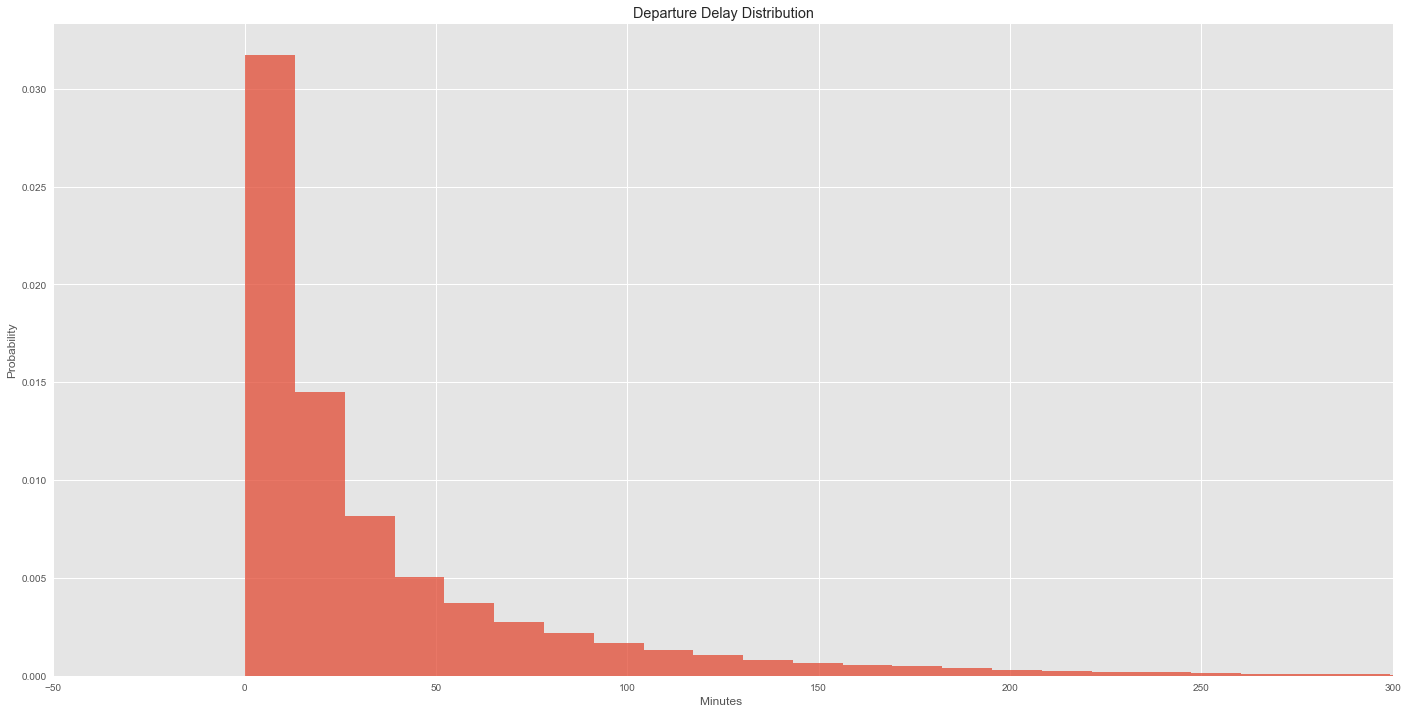

In [96]:
# plt departure delay distribution
plt.figure(figsize=(24, 12))
plt.hist(dep_delay.dep_delay, bins = 100, normed=1, alpha=0.75)
plt.xlim(-50,300)
plt.xlabel('Minutes ')
plt.ylabel('Probability')
plt.title('Departure Delay Distribution')

In [105]:
# First 10 fastest flight departing from NYC
df['speed_in_mph'] = df.distance/(df.air_time/60)
x = ['origin','dest','speed_in_mph']
df.sort_values('speed_in_mph',ascending = False)[x].head(10)

,origin,dest,speed_in_mph
216447,LGA,ATL,703.384615
251999,EWR,MSP,650.322581
205388,EWR,GSP,648.000000
157516,EWR,BNA,641.142857
119700,JFK,SJU,554.219653
70551,JFK,SJU,554.219653
71314,JFK,SJU,554.219653
144509,JFK,SJU,551.034483
129686,JFK,SJU,551.034483
70792,EWR,STT,550.786517


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

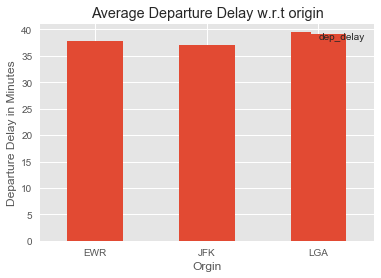

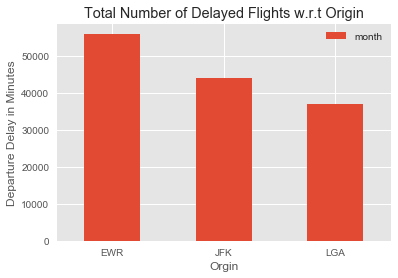

In [114]:
#departure delay w.r.t origin
plt.figure(figsize=(12, 6))
df[['origin','dep_delay']].groupby('origin').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Orgin')
plt.ylabel('Departure Delay in Minutes')
plt.title('Average Departure Delay w.r.t origin')

#departure delay w.r.t origin
plt.figure(figsize=(12, 6))
df[['origin','month']].groupby('origin').count().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Orgin')
plt.ylabel('Departure Delay in Minutes')
plt.title('Total Number of Delayed Flights w.r.t Origin')